# Univariant time series analysis

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
# import data
dataset=pd.read_csv("timeseries_dataset/PH-Sales.csv")

In [3]:
# Top 5 records
dataset.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
# Bottom 5 records
dataset.tail()

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# check for null and missing values
dataset.isnull().sum()

Month-Year                0
Number of Tractor Sold    0
dtype: int64

In [7]:
# Generate datetime coulmn corresponding to the Month-Year column
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(dataset))
len(dates)

144

In [8]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [9]:
dataset['month']=dates.month
dataset['year']=dates.year

In [10]:
dataset['month']=dataset['month'].apply(lambda x: calendar.month_abbr[x])

In [11]:
dataset

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003
...,...,...,...,...
139,Aug-14,848,Aug,2014
140,Sep-14,640,Sep,2014
141,Oct-14,581,Oct,2014
142,Nov-14,519,Nov,2014


In [12]:
# Rename columns
dataset.columns = dataset.columns.str.replace('Number of Tractor Sold', 'sales')

In [13]:
 dataset.set_index(dates, inplace=True)

In [14]:
dataset

,Month-Year,sales,month,year
2003-01-01,Jan-03,141,Jan,2003
2003-02-01,Feb-03,157,Feb,2003
2003-03-01,Mar-03,185,Mar,2003
2003-04-01,Apr-03,199,Apr,2003
2003-05-01,May-03,203,May,2003
...,...,...,...,...
2014-08-01,Aug-14,848,Aug,2014
2014-09-01,Sep-14,640,Sep,2014
2014-10-01,Oct-14,581,Oct,2014
2014-11-01,Nov-14,519,Nov,2014


In [15]:
dataset= dataset[["sales", "month", "year"]]
dataset.head(10)

,sales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003
2003-06-01,189,Jun,2003
2003-07-01,207,Jul,2003
2003-08-01,207,Aug,2003
2003-09-01,171,Sep,2003
2003-10-01,150,Oct,2003


In [16]:
ts_sales= dataset["sales"]

In [17]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: sales, Length: 144, dtype: int64

<AxesSubplot:>

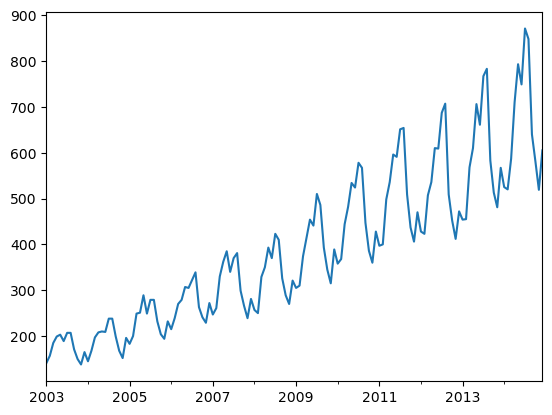

In [18]:
ts_sales.plot()

In [19]:
# decompose data into trend, seasonal, residual noise
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
decompose = seasonal_decompose(ts_sales)

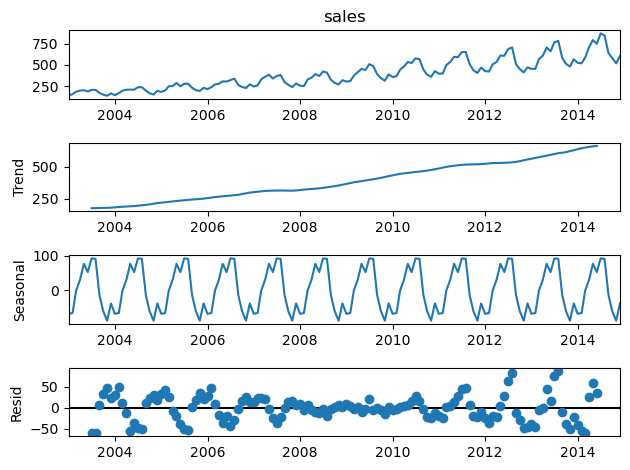

In [21]:
decompose.plot();

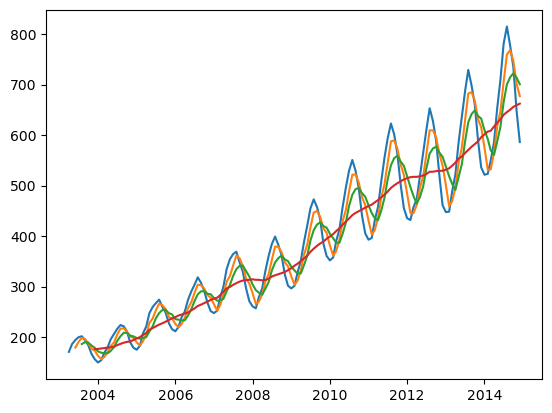

In [22]:
# Simple moving average
plt.plot(ts_sales.rolling(window=4).mean());
plt.plot(ts_sales.rolling(window=6).mean());
plt.plot(ts_sales.rolling(window=8).mean());
plt.plot(ts_sales.rolling(window=12).mean());

<AxesSubplot:xlabel='month'>

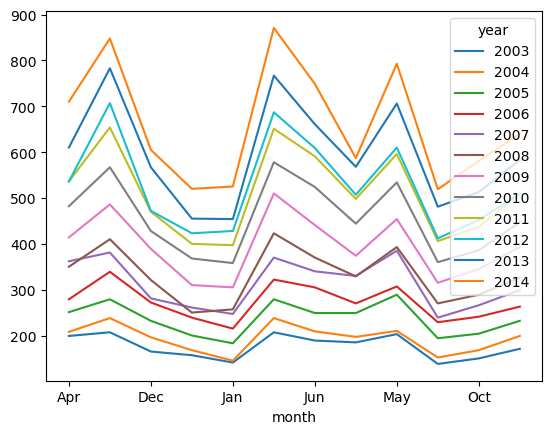

In [23]:
# Some more visualization
pd.pivot(dataset, values="sales", index='month', columns='year').plot()

<AxesSubplot:xlabel='year'>

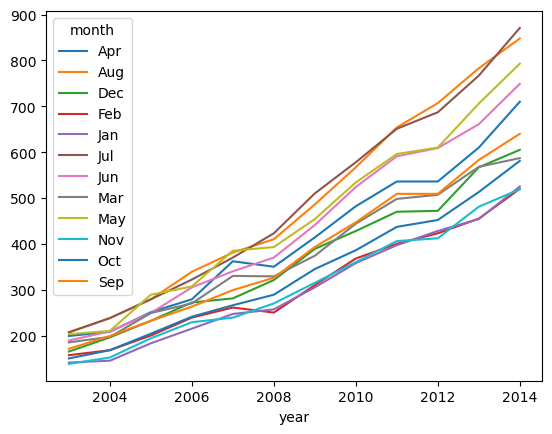

In [24]:
pd.pivot(dataset, values="sales", index='year', columns='month').plot()

<AxesSubplot:>

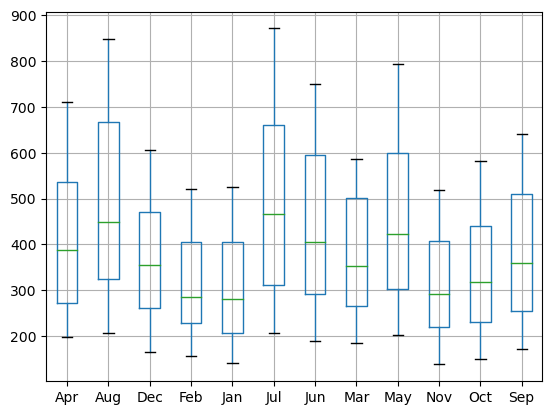

In [25]:
pd.pivot(dataset, values="sales", index='year', columns='month').boxplot()

In [26]:
import seaborn as sns

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

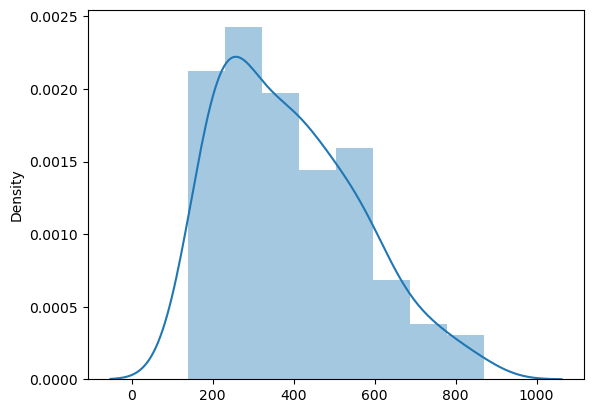

In [27]:
sns.distplot(pd.pivot(dataset, values="sales", index='year', columns='month'))

In [28]:
# Use stats model to check if the data is stationary or non-stationary
# ADF = Augmented Dickey Fuller
from statsmodels.tsa.stattools import adfuller

In [29]:
def test_stationary(timeSeries):
    rolmean = timeSeries.rolling(12).mean()
    rolestd = timeSeries.rolling(12).std()
    plt.figure(figsize=(18, 10))
    plt.grid('both')
    plt.plot(timeSeries, label="Actual timeseries")
    plt.plot(rolmean, label="Rolling Mean")
    plt.plot(rolestd, label="Rolling STD")    
    plt.legend()
    plt.show()
    
    print("--------------------------------------")
    print("Augmented Dickey Fuller")
    dftest = adfuller(timeSeries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'No. of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Confidense Interval (%s)' %key] = value
    print(dfoutput)

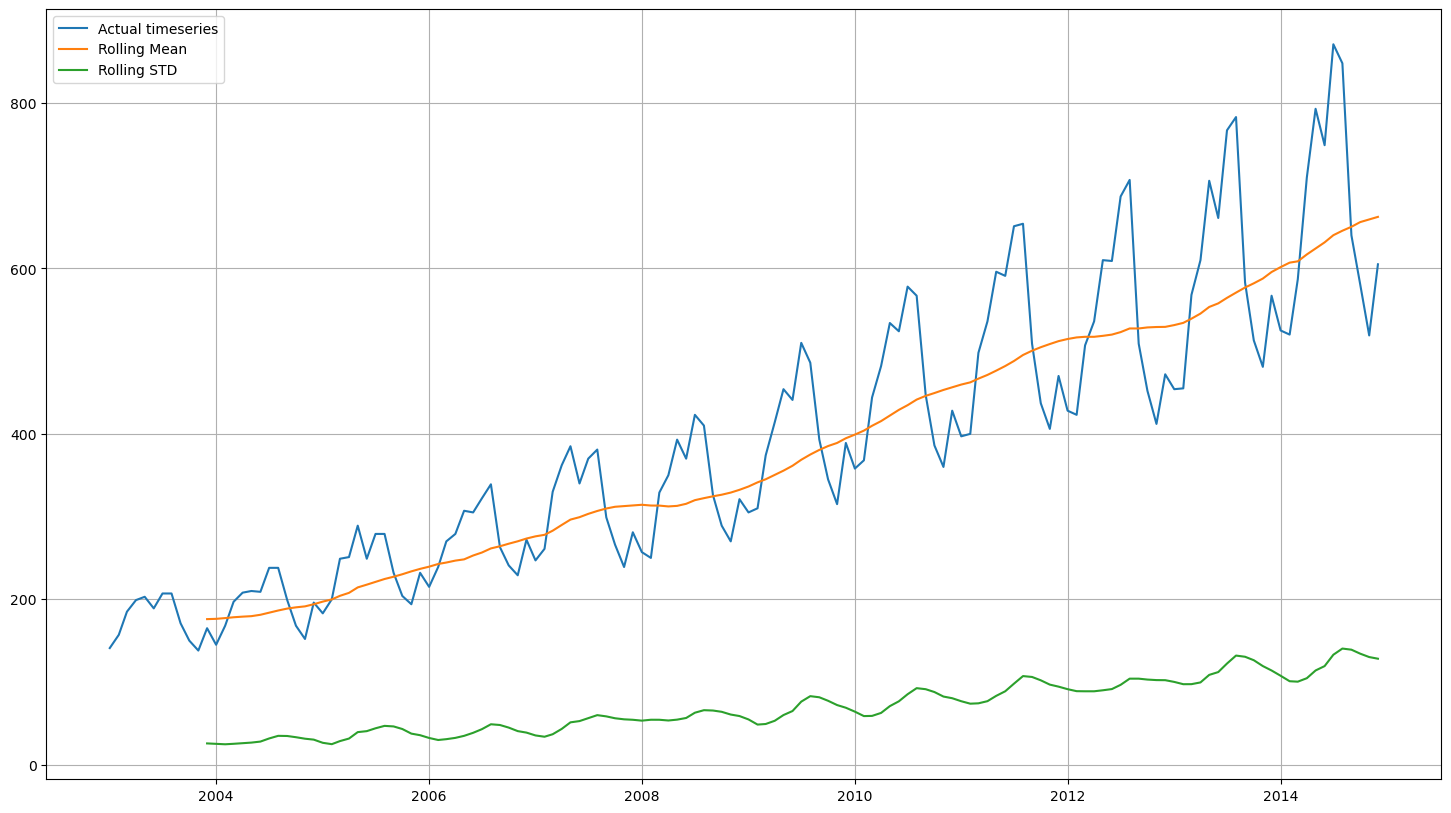

--------------------------------------
Augmented Dickey Fuller
Test Statistic                 1.108825
p-value                        0.995291
#lags used                    14.000000
No. of observations used     129.000000
Confidense Interval (1%)      -3.482088
Confidense Interval (5%)      -2.884219
Confidense Interval (10%)     -2.578864
dtype: float64


In [30]:
test_stationary(ts_sales)

In [31]:
# Differencing to make data stationary
one_diff_data = ts_sales.diff(periods=1)
one_diff_data.dropna(inplace=True)

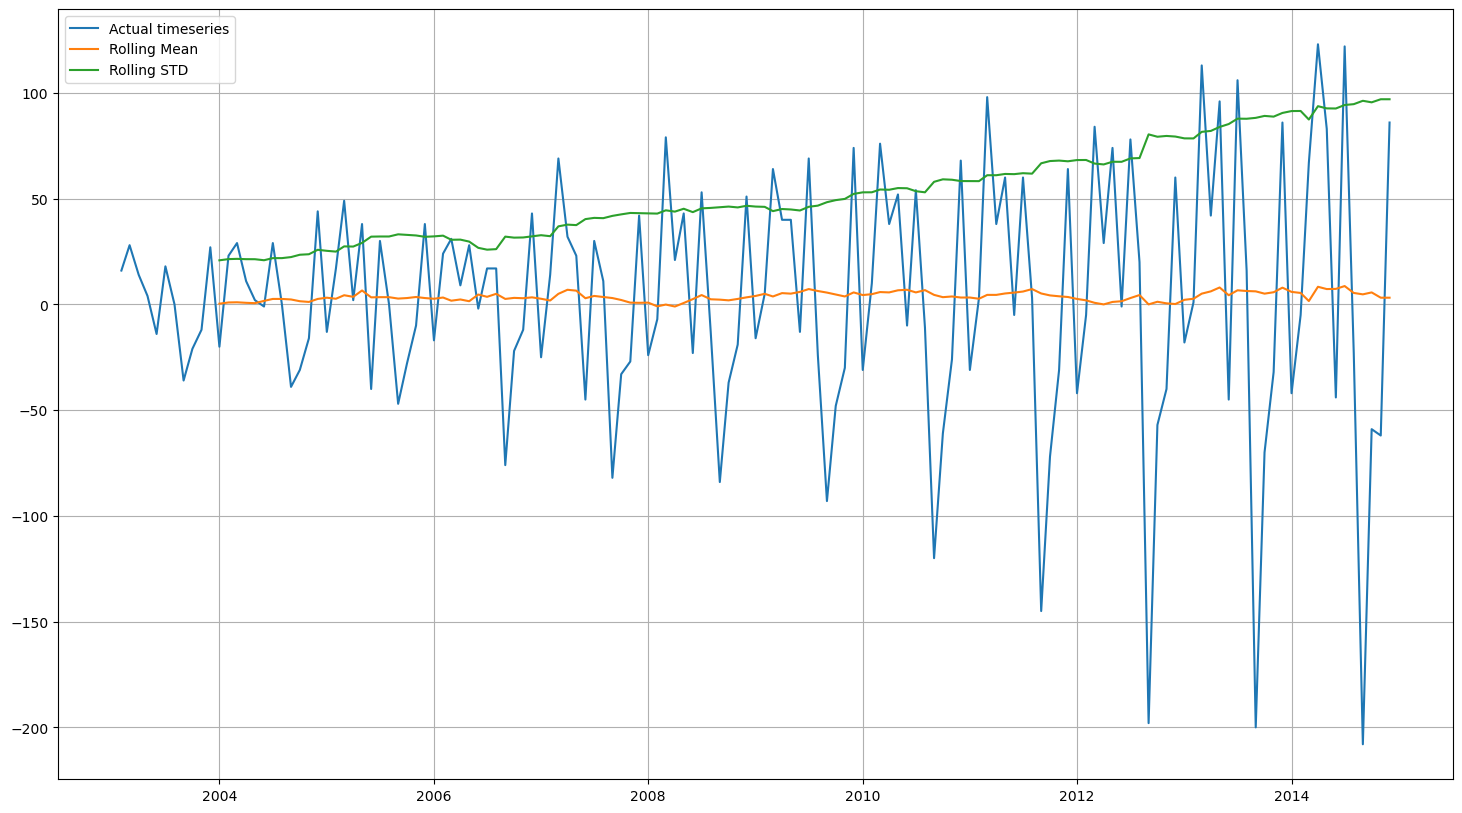

--------------------------------------
Augmented Dickey Fuller
Test Statistic                -2.543481
p-value                        0.105250
#lags used                    14.000000
No. of observations used     128.000000
Confidense Interval (1%)      -3.482501
Confidense Interval (5%)      -2.884398
Confidense Interval (10%)     -2.578960
dtype: float64


In [32]:
test_stationary(one_diff_data)

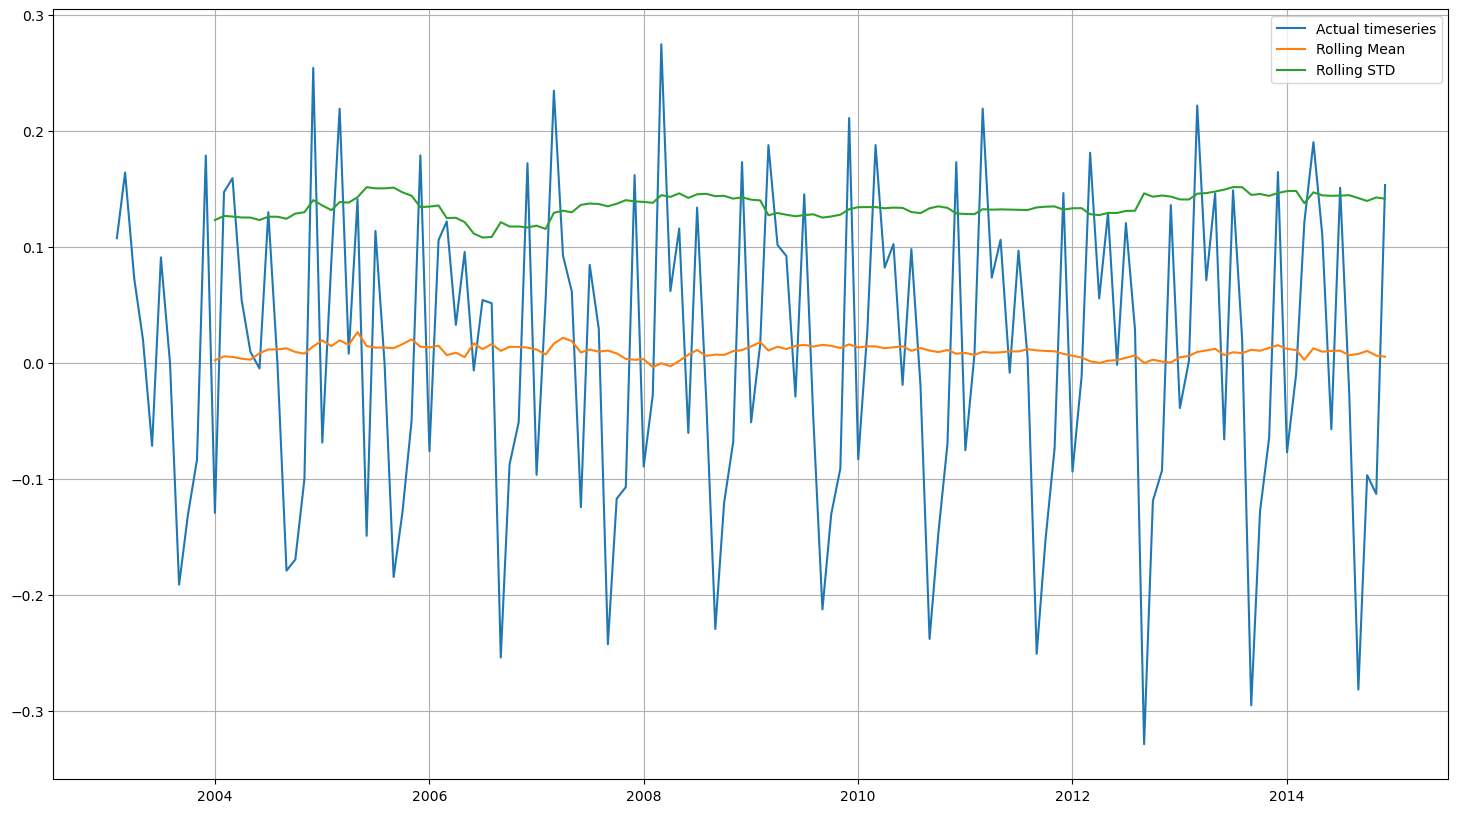

--------------------------------------
Augmented Dickey Fuller
Test Statistic                -2.680467
p-value                        0.077480
#lags used                    14.000000
No. of observations used     128.000000
Confidense Interval (1%)      -3.482501
Confidense Interval (5%)      -2.884398
Confidense Interval (10%)     -2.578960
dtype: float64


In [33]:
# Applying Log transformation and differencing to make data stationary
log_diff_data = np.log(ts_sales).diff(periods=1)
log_diff_data.dropna(inplace=True)
test_stationary(log_diff_data)

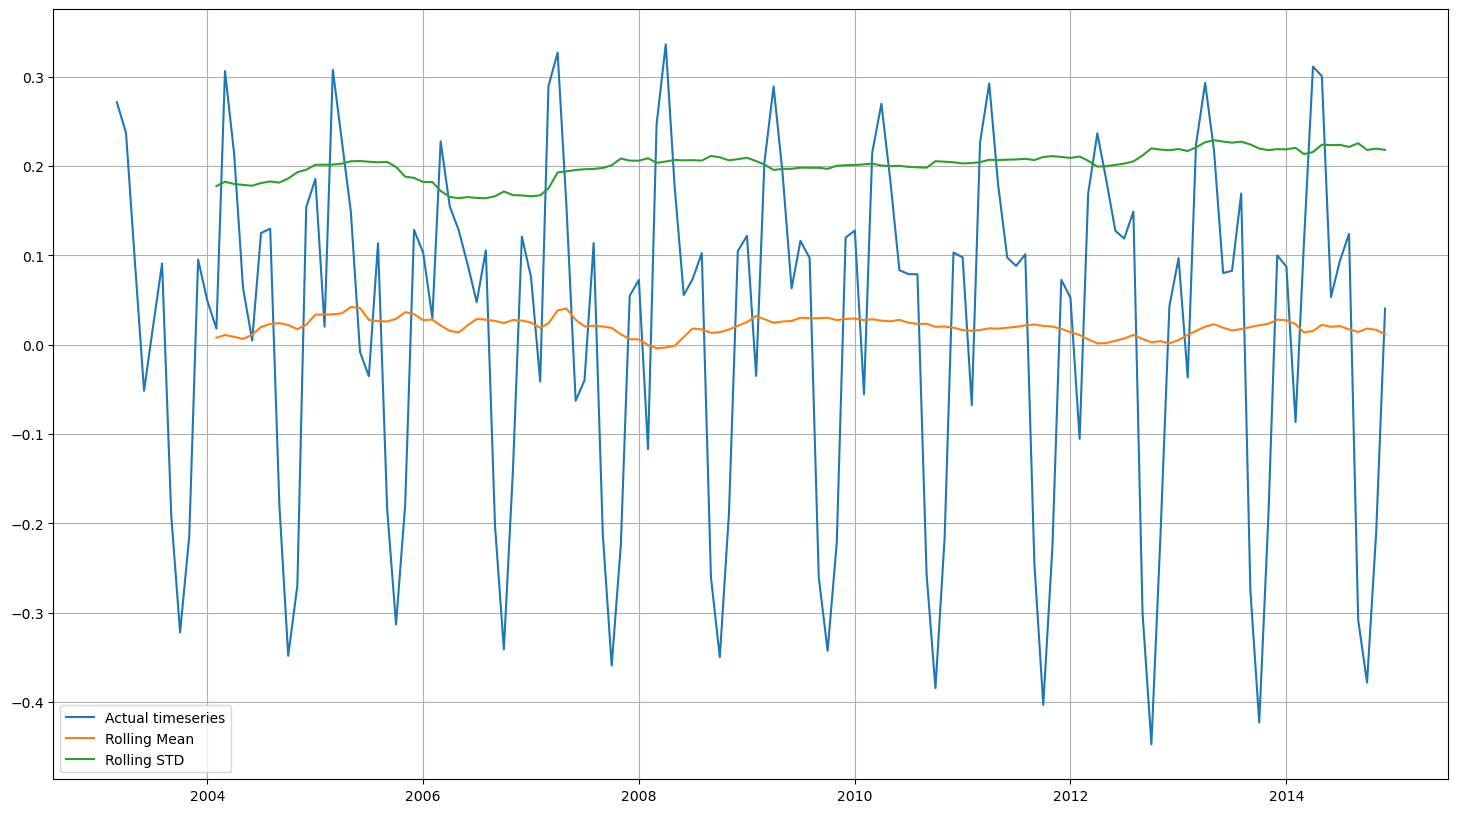

--------------------------------------
Augmented Dickey Fuller
Test Statistic                -3.200722
p-value                        0.019943
#lags used                    11.000000
No. of observations used     130.000000
Confidense Interval (1%)      -3.481682
Confidense Interval (5%)      -2.884042
Confidense Interval (10%)     -2.578770
dtype: float64


In [34]:
# Since the p-value is greater than 0.05, it means the data is still non-stationary, So lets apply second degree difference
log_diff_data = np.log(ts_sales).diff(periods=2)
log_diff_data.dropna(inplace=True)
test_stationary(log_diff_data)

In [42]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

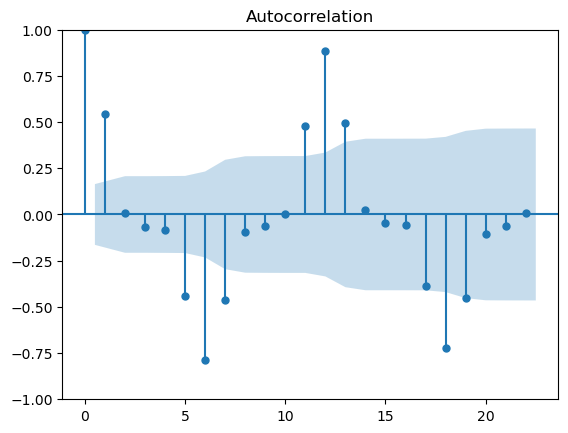

In [43]:
# ACF - The autocorrelation function
smt.graphics.plot_acf(log_diff_data);

C:\Users\Ashwin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


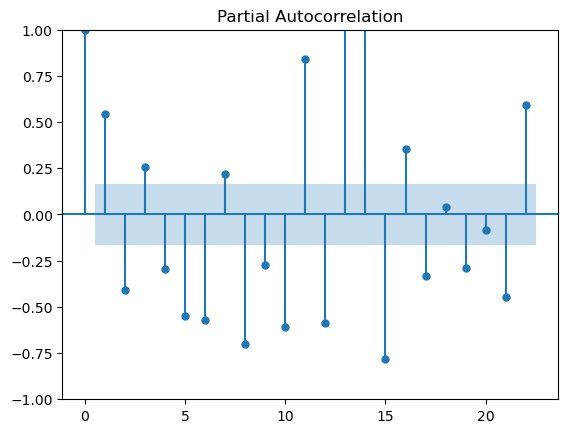

In [45]:
# PACF - The Partial autocorrelation function
smt.graphics.plot_pacf(log_diff_data);

In [ ]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order)
model.fit()
model.forecast()

In [39]:
#MSE
np.sqrt(mean_squared_error(y, prediction))

In [ ]:
#p,d,q
# p=auto_regression
# d=differencing
# q=moving_average

In [ ]:
def arima_model(X, y, arima_oder):
    history=[i for i in X]
    prediction=list()
    for i in range(len(y)):
        model=ARIMA(data, order=())
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        prediction.append(yhat)
        history.append(yhat[t])
    mse=np.sqrt(mean_squared_error(y, prediction))
    return mse

In [49]:
def evaluate_arima_model(train_data, test_data, p_value, d_value, q_value):
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order=(i,j,k)
                try:
                    rmse = arima_model(dataset, test, order)
                    if rmse<best_score:
                        best_score, best_cfg=rmse, order
                        print(rmse, order)
                except:
                    continue

In [52]:
p_value=range(0,2)
d_value=range(0,2)
q_value=range(0,2)

In [61]:
print(len(log_diff_data))
# 12 months
# Last 2 year data as a test data
#24
#142-24=118

# Train test split
train_data=log_diff_data[:118]
test_data=log_diff_data[118:]
print(len(train_data))

142
118


In [62]:
train_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 118 entries, 2003-03-01 to 2012-12-01
Freq: MS
Series name: sales
Non-Null Count  Dtype  
--------------  -----  
118 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [63]:
test_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 24 entries, 2013-01-01 to 2014-12-01
Freq: MS
Series name: sales
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


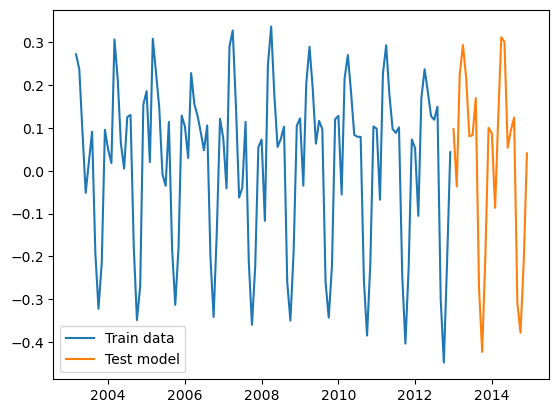

In [66]:
plt.plot(train_data,label="Train data")
plt.plot(test_data, label="Test model")
plt.legend()

In [69]:
data=[i for i in train_data]
data

[0.27159593470015597,
 0.23705901937618457,
 0.09285015396346274,
 -0.051557809664849685,
 0.019512814223581643,
 0.09097177820572622,
 -0.19105523676270852,
 -0.3220834991691133,
 -0.2144098713454552,
 0.09531017980432477,
 0.049480057263369126,
 0.018018505502678472,
 0.3064699863174143,
 0.21357410029805912,
 0.06390380197947998,
 0.004796172263493048,
 0.12516314295400655,
 0.12993642170666408,
 -0.17896584894698275,
 -0.34830669426821625,
 -0.2694243038782158,
 0.15415067982725805,
 0.1856056319951449,
 0.020202707317519497,
 0.307966743623286,
 0.22713557258374717,
 0.14897379164772495,
 -0.008000042667076102,
 -0.03521490629106694,
 0.11375888535665801,
 -0.1844744101550555,
 -0.3130917879771493,
 -0.17887921260298167,
 0.12861737782209381,
 0.10277986906433423,
 0.02972618026520113,
 0.22778393087071258,
 0.15474822988985437,
 0.1284257885888218,
 0.08909999478604647,
 0.04770379795721169,
 0.10568833077303807,
 -0.2023975133666438,
 -0.34120317388979515,
 -0.13843202862352477,

In [75]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(1,1,1))
result = model.fit()

In [77]:
result.forecast() # this is the 119th value being predicted

array([0.16424739])

In [81]:
# True value at 119th position
log_diff_data[121]

0.293161538216407

In [53]:
evaluate_arima_model(train_data, test_data, p_value, d_value, q_value)

0 0 0
0 0 1
0 1 0
0 1 1
1 0 0
1 0 1
1 1 0
1 1 1


In [ ]:
# ARIMA & SARIMA

In [36]:
#PACF & ACF

In [37]:
#AIC & BIC

In [38]:
#PREDICTION

In [40]:
#Outofbox Forcasting